# <center>CPE352 Data Science</center>
# <center>Lab Lecture 03 - Network Data</center>
---

## Given the social network data, find the following answer

## • Who are the most popular?

### -เตรียมข้อมูล

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
dolphin_edges = pd.read_csv('../Data/dolphin_edges.csv')
dolphin_edges.head(5)

,From,To
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish


In [3]:
dolphin_vertices = pd.read_csv('../Data/dolphin_vertices.csv')
dolphin_vertices.head(5)

,Name,Gender
0,Beak,Male
1,Beescratch,Male
2,Bumper,Male
3,CCL,Female
4,Cross,Male


### -สร้าง Graph

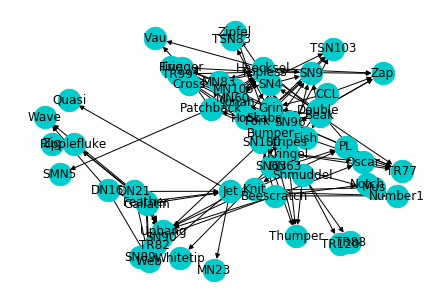

In [21]:
dolphin_graph = nx.from_pandas_edgelist(dolphin_edges,source = 'From',target = 'To',create_using=nx.MultiDiGraph)
nx.draw(dolphin_graph, with_labels=True, node_size=500, node_color='#00CCCC')

In [6]:
print(nx.info(dolphin_graph))

Name: 
Type: MultiDiGraph
Number of nodes: 62
Number of edges: 159
Average in degree:   2.5645
Average out degree:   2.5645


### -หา in degree

In [23]:
dolphin_in_degree = pd.DataFrame(dolphin_graph.in_degree, columns=['From','To'])

#แสดง dolphin_in_degree ที่มากที่สุด
dolphin_in_degree[dolphin_in_degree['To'] == max(dolphin_in_degree['To'])]

,From,To
49,Trigger,9
56,Web,9


    จากการหา in degree ทำให้ทราบว่า Trigger และ Web มีความ popular มากที่สุด

## • Pick 2 individuals, find the shortest path between them

In [28]:
nx.shortest_path(dolphin_graph,'DN16','Ripplefluke')

['DN16', 'Feather', 'Ripplefluke']

        จากการหา Shortest Path ระหว่าง DN16 และ Ripplefluke ทำให้ทราบว่า ระยะทางที่สั้นที่สุดระหว่าง DN16 และ Ripplefluke คือ เริ่มจาก DN16 ไปยัง Feather และสุดท้ายไปยัง Ripplefluke ก็จะถึงเป้าหมาย

## • What does the shortest path mean?

    Shortest Path คือ การหาเส้นทางที่มีระยะทางสั้นที่สุด จากจุดเริ่มต้นไปยังอีกจุดหนึ่ง โดยส่วนตัวแล้วคิดว่า Shortest Path ในความหมายของ Dolphin 
    Dataset นี้ คือ ระยะทางที่สั้นที่สุดในการติดต่อสื่อสารกันในระหว่าง Dolphin ตัวหนี่งไปอีกตัวหนี่ง

## • Find how many components are there in the network

In [33]:
dolphin_edgelist = nx.from_pandas_edgelist(dolphin_edges,source = 'From',target = 'To')

In [34]:
dolphin_components = [x for x in nx.connected_components(dolphin_edgelist)]
print(dolphin_components)

[{'Cross', 'Zap', 'DN16', 'Zig', 'TR77', 'Web', 'TSN103', 'SN100', 'Fish', 'Five', 'Beak', 'Notch', 'Hook', 'Gallatin', 'SN90', 'Oscar', 'SN9', 'TR82', 'Scabs', 'MN105', 'Beescratch', 'DN21', 'Feather', 'Stripes', 'Jet', 'Trigger', 'SMN5', 'TSN83', 'Kringel', 'Ripplefluke', 'Quasi', 'Knit', 'Fork', 'Double', 'CCL', 'Topless', 'Thumper', 'SN63', 'Jonah', 'Vau', 'SN96', 'DN63', 'Patchback', 'Whitetip', 'SN4', 'Shmuddel', 'Upbang', 'TR120', 'Bumper', 'SN89', 'Wave', 'Haecksel', 'Number1', 'Mus', 'Grin', 'MN60', 'MN83', 'MN23', 'PL', 'TR99', 'Zipfel', 'TR88'}]


In [35]:
len(dolphin_components)

1

    จากการหา components ใน network จะได้ว่า มี 1 components ใน network นี้

---